In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.9
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.9_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.9_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	961.5334

Best Fitness:	932.9638
Solution:	900.0000
Diff:		32.9638

[0:11:46][----------] 1.96% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	962.7806

Best Fitness:	934.2926
Solution:	900.0000
Diff:		34.2926

[0:22:28][----------] 3.92% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	961.4645

Best Fitness:	932.2967
Solution:	900.0000
Diff:		32.2967

[0:33:38][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	958.7427

Best Fitness:	923.9706
Solution:	900.0000
Diff:		23.9706

[0:43:28][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	956.3618

Best Fitness:	931.6696
Solution:	900.0000
Diff:		31.6696

[0:52:41][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	961.6418

Best Fitness:	935.7163
Solution:	900.0000
Diff:		35.7163

[1:02:01][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	956.2052

Best Fitness:	930.3635
Solution:	900.0000
Diff:		30.3635

[1:11:12][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	952.0242

Best Fitness:	918.8691
Solution:	900.0000
Diff:		18.8691

[1:20:10][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	953.4327

Best Fitness:	929.1754
Solution:	900.0000
Diff:		29.1754

[1:29:23][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	955.8566

Best Fitness:	927.4831
Solution:	900.0000
Diff:		27.4831

[1:38:08][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	954.1546

Best Fitness:	927.1738
Solution:	900.0000
Diff:		27.1738

[1:46:06][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	960.0322

Best Fitness:	934.6199
Solution:	900.0000
Diff:		34.6199

[1:54:01][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	957.2798

Best Fitness:	933.3668
Solution:	900.0000
Diff:		33.3668

[2:02:07][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	961.9695

Best Fitness:	936.4126
Solution:	900.0000
Diff:		36.4126

[2:10:19][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	957.6009

Best Fitness:	925.4205
Solution:	900.0000
Diff:		25.4205

[2:18:12][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	958.6428

Best Fitness:	933.0434
Solution:	900.0000
Diff:		33.0434

[2:25:37][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	965.2203

Best Fitness:	931.4579
Solution:	900.0000
Diff:		31.4579

[2:32:41][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	959.0691

Best Fitness:	931.9742
Solution:	900.0000
Diff:		31.9742

[2:39:44][####------] 35.29% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	958.8272

Best Fitness:	930.4940
Solution:	900.0000
Diff:		30.4940

[2:46:42][####------] 37.25% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	956.3783

Best Fitness:	934.0832
Solution:	900.0000
Diff:		34.0832

[2:53:33][####------] 39.22% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	953.6247

Best Fitness:	926.0391
Solution:	900.0000
Diff:		26.0391

[3:00:27][####------] 41.18% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	957.8587

Best Fitness:	930.6935
Solution:	900.0000
Diff:		30.6935

[3:06:40][####------] 43.14% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	961.5409

Best Fitness:	931.2896
Solution:	900.0000
Diff:		31.2896

[3:12:39][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	954.4231

Best Fitness:	928.8197
Solution:	900.0000
Diff:		28.8197

[3:18:25][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	962.0041

Best Fitness:	937.8100
Solution:	900.0000
Diff:		37.8100

[3:24:21][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	960.0188

Best Fitness:	929.8847
Solution:	900.0000
Diff:		29.8847

[3:30:13][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	959.5324

Best Fitness:	932.9336
Solution:	900.0000
Diff:		32.9336

[3:36:03][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	959.2123

Best Fitness:	920.6042
Solution:	900.0000
Diff:		20.6042

[3:41:20][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	957.7042

Best Fitness:	932.2460
Solution:	900.0000
Diff:		32.2460

[3:46:13][######----] 56.86% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	955.9554

Best Fitness:	924.9958
Solution:	900.0000
Diff:		24.9958

[3:51:06][######----] 58.82% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	958.0427

Best Fitness:	927.8415
Solution:	900.0000
Diff:		27.8415

[3:55:59][######----] 60.78% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	952.3133

Best Fitness:	924.1716
Solution:	900.0000
Diff:		24.1716

[4:00:49][######----] 62.75% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	958.4878

Best Fitness:	923.3388
Solution:	900.0000
Diff:		23.3388

[4:05:40][######----] 64.71% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	956.7501

Best Fitness:	918.6153
Solution:	900.0000
Diff:		18.6153

[4:10:05][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	964.1517

Best Fitness:	933.1649
Solution:	900.0000
Diff:		33.1649

[4:14:02][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	959.3254

Best Fitness:	929.9490
Solution:	900.0000
Diff:		29.9490

[4:17:57][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	951.3212

Best Fitness:	924.6235
Solution:	900.0000
Diff:		24.6235

[4:21:48][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	958.4472

Best Fitness:	934.7039
Solution:	900.0000
Diff:		34.7039

[4:25:40][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	957.9232

Best Fitness:	929.0897
Solution:	900.0000
Diff:		29.0897

[4:29:33][########--] 76.47% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	955.2017

Best Fitness:	927.6394
Solution:	900.0000
Diff:		27.6394

[4:33:02][########--] 78.43% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	958.4578

Best Fitness:	926.1839
Solution:	900.0000
Diff:		26.1839

[4:36:03][########--] 80.39% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	961.7899

Best Fitness:	937.6100
Solution:	900.0000
Diff:		37.6100

[4:39:04][########--] 82.35% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	959.7070

Best Fitness:	929.0228
Solution:	900.0000
Diff:		29.0228

[4:42:09][########--] 84.31% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	957.0767

Best Fitness:	927.3290
Solution:	900.0000
Diff:		27.3290

[4:45:10][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	954.6966

Best Fitness:	921.2884
Solution:	900.0000
Diff:		21.2884

[4:48:11][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	950.1844

Best Fitness:	925.6002
Solution:	900.0000
Diff:		25.6002

[4:50:54][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	955.6267

Best Fitness:	928.7540
Solution:	900.0000
Diff:		28.7540

[4:53:19][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	955.3787

Best Fitness:	924.6542
Solution:	900.0000
Diff:		24.6542

[4:55:42][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	956.9829

Best Fitness:	927.9623
Solution:	900.0000
Diff:		27.9623

[4:58:06][##########] 96.08% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	959.4208

Best Fitness:	931.7234
Solution:	900.0000
Diff:		31.7234

[5:00:29][##########] 98.04% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	955.1240

Best Fitness:	930.8351
Solution:	900.0000
Diff:		30.8351

[5:03:00][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:03:00

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
293,57.642038,57.187244,47.148828,55.560268,52.346711,52.233962,53.932007,60.813538,68.326719,55.744691,...,61.040303,57.583747,62.269354,51.461955,47.512638,54.575849,69.732216,45.135173,51.417324,50
294,57.642038,57.187244,47.148828,55.560268,52.346711,52.233962,53.932007,60.813538,68.326719,55.744691,...,61.040303,57.583747,62.269354,51.461955,47.512638,54.575849,69.732216,45.135173,51.417324,50
295,57.642038,57.187244,47.148828,55.560268,52.346711,52.233962,53.932007,60.813538,68.326719,55.744691,...,61.040303,57.583747,62.183341,51.461955,47.512638,54.575849,69.732216,45.135173,51.417324,50
296,57.642038,57.187244,47.148828,55.560268,52.346711,52.233962,53.932007,60.813538,68.326719,55.744691,...,61.040303,57.583747,62.183341,51.461955,47.512638,54.575849,69.732216,45.135173,51.417324,50
297,57.642038,57.187244,47.148828,55.560268,52.346711,52.233962,53.932007,60.813538,68.326719,55.744691,...,61.040303,57.583747,62.183341,51.461955,47.512638,54.575849,69.732216,45.135173,51.417324,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 32.96376657158203

Best error for run 1: 34.29260989528518

Best error for run 2: 32.29669732949969

Best error for run 3: 23.970633602987164

Best error for run 4: 31.669586143414676

Best error for run 5: 35.716264259557875

Best error for run 6: 30.363467116808124

Best error for run 7: 18.869059146686368

Best error for run 8: 29.17541970120567

Best error for run 9: 27.4830943333277

Best error for run 10: 27.173809191090072

Best error for run 11: 34.61992492233219

Best error for run 12: 33.36679160311496

Best error for run 13: 36.412624790443715

Best error for run 14: 25.42047808658424

Best error for run 15: 33.04344241190927

Best error for run 16: 31.457948633918704

Best error for run 17: 31.974223928267975

Best error for run 18: 30.49401065223833

Best error for run 19: 34.08316708492089

Best error for run 20: 26.039141837262832

Best error for run 21: 30.693469251408146

Best error for run 22: 31.28960244850873

Best error for run 23: 28.819667493176667

Best error for run 24: 37.81002238735243

Best error for run 25: 29.884742237025193

Best error for run 26: 32.93364340183791

Best error for run 27: 20.604168928357126

Best error for run 28: 32.246032847555625

Best error for run 29: 24.99575673268737

Best error for run 30: 27.841524680977955

Best error for run 31: 24.171579134603235

Best error for run 32: 23.338832574678463

Best error for run 33: 18.615307151676348

Best error for run 34: 33.16487842972765

Best error for run 35: 29.94899894535149

Best error for run 36: 24.623508637765553

Best error for run 37: 34.70388329852665

Best error for run 38: 29.089707592738478

Best error for run 39: 27.63939996454576

Best error for run 40: 26.18386786809731

Best error for run 41: 37.60997088075442

Best error for run 42: 29.022803210406096

Best error for run 43: 27.329022397397353

Best error for run 44: 21.288371121097498

Best error for run 45: 25.600195788170822

Best error for run 46: 28.754025819237086

Best error for run 47: 24.654195332444488

Best error for run 48: 27.96231263855657

Best error for run 49: 31.723437189791525

Best error for run 50: 30.83507827146036

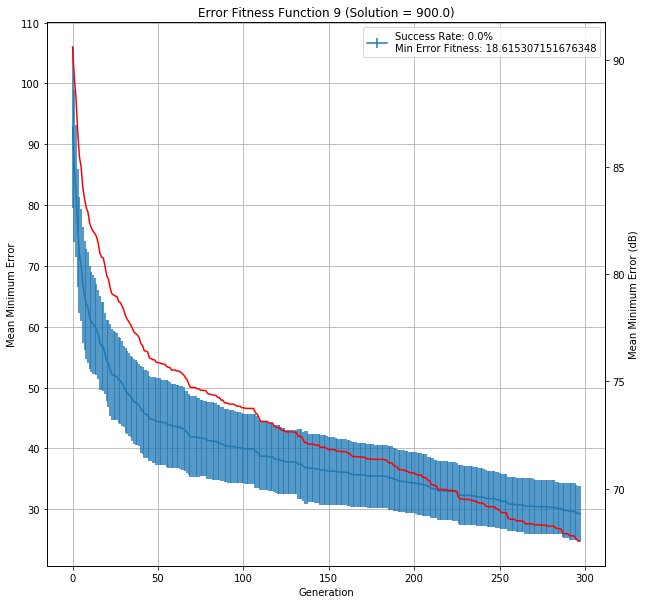

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.9_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.9,32.963767,34.29261,32.296697,23.970634,31.669586,35.716264,...,21.288371,25.600196,28.754026,24.654195,27.962313,31.723437,30.835078,29.299297,5:03:00,90000
